Today we're going to be diving deep into a dataset all about LEGO, which will help us answer a whole bunch of interesting questions about the history of the company, their product offering, and which LEGO set rules them all:

What is the most enormous LEGO set ever created and how many parts did it have?

In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?



What you'll learn today



How to combine a Notebook with HTML Markup.

Apply Python List slicing techniques to Pandas DataFrames.

How to aggregate data using the .agg() function.

How to create scatter plots, bar charts, and line charts with two axes in Matplotlib.

Understand database schemas that are organised by primary and foreign keys.

How to merge DataFrames that share a common key

<img src="assets/bricks.jpg">

<h1>Import Statement</h1>
<h3>Code below</h3>

In [3]:
import pandas as pd

df =pd.read_csv("data/colors.csv")

In [5]:
df

id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]

In [6]:
df["name"].nunique()

135

In [12]:
transparent = df[df["is_trans"]=="t"]

In [13]:
transparent.count()

id          28
name        28
rgb         28
is_trans    28
dtype: int64

In [15]:
opaque = df[df["is_trans"]=="f"]
opaque.count()

id          107
name        107
rgb         107
is_trans    107
dtype: int64

In [17]:
107+28

135

<h1> Understanding LEGO Themese vs LEGO Sets</h1>
<h4>Walk into a LEGO store and you will see their products organized by theme. THeir themese include Star Wars. Batman, Harry Potter and many more.</h4>
<img src="assets/lego_themes.png">
<h4> A Lego <em> set </em> is a particular box of LEGO or product. Therefor, a single theme typucally has different sets.
<img src="assets/lego_sets.png">

In [19]:
sets_df =pd.read_csv("data/sets.csv")
sets_df.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [20]:
sets_df

set_num                                 name  year  theme_id  \
0            001-1                                Gears  1965         1   
1           0011-2                    Town Mini-Figures  1978        84   
2           0011-3           Castle 2 for 1 Bonus Offer  1987       199   
3           0012-1                   Space Mini-Figures  1979       143   
4           0013-1                   Space Mini-Figures  1979       143   
...            ...                                  ...   ...       ...   
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
0             43  
1             12  
2              0  
3             12  
4             12  
...          ...  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  

[15710 rows x 5 columns]

In [21]:
sets_df.sort_values("year")

set_num                               name  year  theme_id  num_parts
9521   700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534   700.2-1               Large Gift Set (ABB)  1949       365        178
9539   700.3-1              Medium Gift Set (ABB)  1949       365        142
9544   700.A-1              Small Brick Set (ABB)  1949       371         24
9545   700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
...        ...                                ...   ...       ...        ...
11289  75290-1                 Mos Eisley Cantina  2020       158          0
5147   41430-1              Summer Fun Water Park  2020       494       1012
11337  75550-1             Minions Kung Fu Battle  2021       689          0
11335  75547-1           Minion Pilot in Training  2021       689          0
11334  75546-1               Minions in Gru’s Lab  2021       689          0

[15710 rows x 5 columns]

In [25]:
first_set =sets_df[sets_df["year"] == 1949]
first_set.count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

In [29]:
first_sets=sets_df["year"].min()


1949

In [35]:
num_parts=sets_df.sort_values(["num_parts"],ascending=False)
num_parts.head(5)

set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922

In [36]:
import matplotlib.pyplot as plt

In [42]:
sets_by_year = sets_df.groupby("year").count()
sets_by_year.head()

set_num  name  theme_id  num_parts
year                                    
1949        5     5         5          5
1950        6     6         6          6
1953        4     4         4          4
1954       14    14        14         14
1955       28    28        28         28

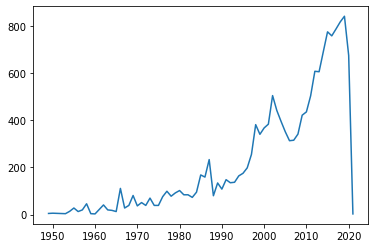

In [47]:
plt.plot(sets_by_year.index,sets_by_year["set_num"])

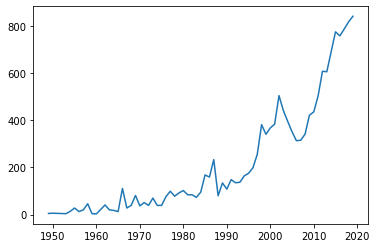

In [49]:
plt.plot(sets_by_year.index[:-2],sets_by_year["set_num"][:-2])

In [50]:
c

In [53]:
themes_by_year.rename(columns = {"theme_id" : "nr_themes"}, inplace=True)

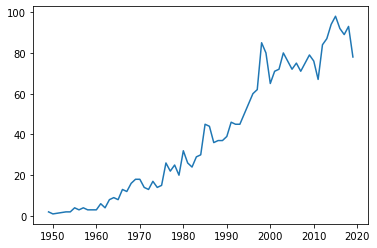

In [54]:
plt.plot(themes_by_year.index[:-2],themes_by_year["nr_themes"][:-2])

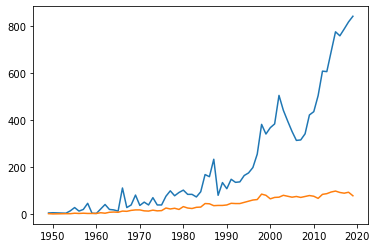

In [55]:
plt.plot(sets_by_year.index[:-2],sets_by_year["set_num"][:-2])
plt.plot(themes_by_year.index[:-2],themes_by_year["nr_themes"][:-2])

Text(0, 0.5, 'Sets by Themes')

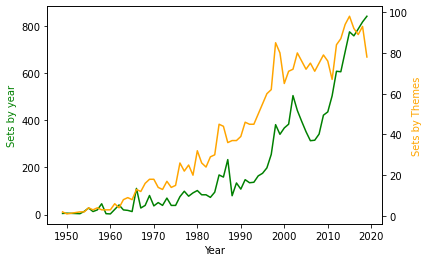

In [58]:
ax1 =plt.gca()
ax2=ax1.twinx()
ax1.plot(sets_by_year.index[:-2],sets_by_year["set_num"][:-2], color="green")
ax2.plot(themes_by_year.index[:-2],themes_by_year["nr_themes"][:-2],color="orange")

ax1.set_xlabel("Year")
ax1.set_ylabel("Sets by year",color="green")
ax2.set_ylabel("Sets by Themes", color ="Orange")

In [72]:
parts_per_set = sets_df.groupby("year").agg({"num_parts":pd.Series.mean})

In [73]:
parts_per_set.rename(columns = {"num_parts" :"Average Parts"}, inplace=True)

In [74]:
parts_per_set.head()

Average Parts
year               
1949      99.600000
1950       1.000000
1953      13.500000
1954      12.357143
1955      36.607143

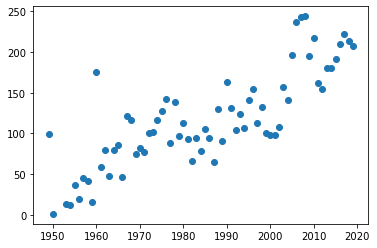

In [85]:
plt.scatter(parts_per_set.index[:-2],parts_per_set["Average Parts"][:-2])

In [86]:
sets_df.head()

set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

In [96]:
sets_per_theme = sets_df["theme_id"].value_counts()

In [97]:
sets_per_theme = pd.DataFrame({"id":sets_per_theme.index, "set_count":sets_per_theme.values})

In [98]:
sets_per_theme

id  set_count
0    158        753
1    501        656
2    494        398
3    435        356
4    503        329
..   ...        ...
566  307          1
567  215          1
568  361          1
569  210          1
570  414          1

[571 rows x 2 columns]

<h1>Relational Database</h1>
<img src="assets/rebrickable_schema.png">

In [79]:
themes_df = pd.read_csv("data/themes.csv")

In [80]:
themes_df

id                   name  parent_id
0      1                Technic        NaN
1      2         Arctic Technic        1.0
2      3            Competition        1.0
3      4         Expert Builder        1.0
4      5                  Model        1.0
..   ...                    ...        ...
591  705               Iron Man      696.0
592  706             Spider-Man      696.0
593  707                  X-Men      696.0
594  708  The LEGO Batman Movie      697.0
595  709               LEGO Art        NaN

[596 rows x 3 columns]

In [83]:
star_wars = themes_df[themes_df["name"] == "Star Wars"]
star_wars

id       name  parent_id
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0

In [99]:
sets_df[sets_df["theme_id"] == star_wars["id"]]

ValueError: Can only compare identically-labeled Series objects

In [103]:
merged_df = pd.merge(sets_per_theme,themes_df, on ="id")

In [104]:
merged_df

id  set_count           name  parent_id
0    158        753      Star Wars        NaN
1    501        656           Gear        NaN
2    494        398        Friends        NaN
3    435        356        Ninjago        NaN
4    503        329      Key Chain      501.0
..   ...        ...            ...        ...
566  307          1       Aquazone        NaN
567  215          1        Pirates      207.0
568  361          1  Skull Spiders      324.0
569  210          1       Belville      207.0
570  414          1         Castle      411.0

[571 rows x 4 columns]

<BarContainer object of 10 artists>

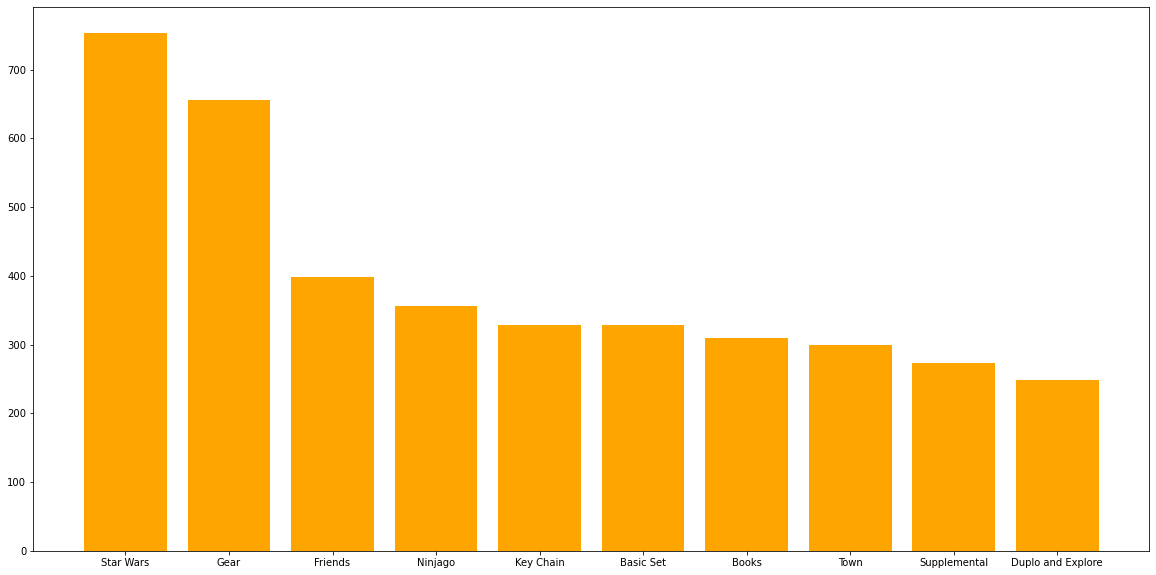

In [113]:
plt.figure(figsize=[20,10])
plt.bar(merged_df.name[:10],merged_df.set_count[:10],color='orange')